# Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q3a

In [2]:
#================= Generating G matrix
rows = 40
cols = 3
t = np.linspace(0,4,40)
m_true = np.array([0.81,16.21,-9.81]).T
G  = np.zeros((rows,cols))

G[:,0] = 1
G[:,1] = t
G[:,2] = 0.5*t**2

#================= Computing d_true
d_true = G@m_true
d_true

array([  0.81      ,   2.42096647,   3.92873767,   5.33331361,
         6.63469428,   7.83287968,   8.92786982,   9.91966469,
        10.8082643 ,  11.59366864,  12.27587771,  12.85489152,
        13.33071006,  13.70333333,  13.97276134,  14.13899408,
        14.20203156,  14.16187377,  14.01852071,  13.77197239,
        13.4222288 ,  12.96928994,  12.41315582,  11.75382643,
        10.99130178,  10.12558185,   9.15666667,   8.08455621,
         6.90925049,   5.63074951,   4.24905325,   2.76416174,
         1.17607495,  -0.5152071 ,  -2.30968442,  -4.207357  ,
        -6.20822485,  -8.31228797, -10.51954635, -12.83      ])

## Q3b

In [3]:
#================= Generating the noisy data d
d = d_true + np.random.normal(0,2,40)
d

array([ -0.77626482,   1.18391243,   0.6999501 ,   3.86194803,
         5.00441151,   9.20188574,   9.92508923,   9.97539865,
        13.07122066,   8.55631929,  14.59266349,  16.60580937,
        14.48423431,   7.82968862,  12.05508797,  18.88060264,
        10.82225318,  15.43788534,  12.43904945,  15.97361695,
        13.27507502,  12.82350424,  12.89243406,  12.34513488,
         8.75641151,  10.65623839,   9.18233817,   9.61736589,
         6.54543846,   4.83772979,   3.58470475,   4.56420862,
         4.86243154,  -0.49060138,   0.52598245,  -4.68744729,
        -6.28002461,  -8.83765103,  -9.02266   , -13.84033128])

## Q3c

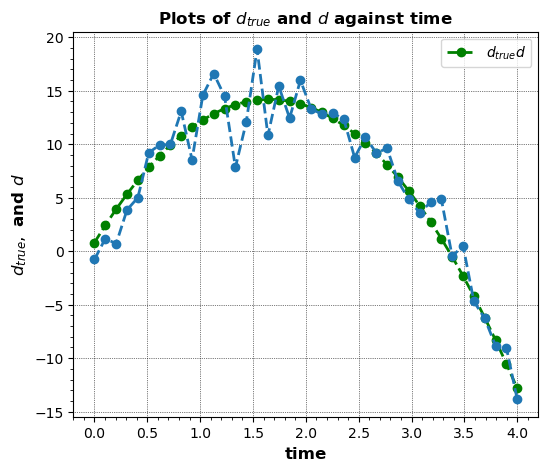

In [4]:
#================= Plotting d_true and noisy data 
plt.figure(figsize = (6,5))
plt.plot(t,d_true,linewidth=2,linestyle='dashed',   marker="o",c="g")
plt.plot(t,d,linewidth=2,linestyle='dashed',   marker="o")
plt.legend(['$d_{true} $''$d$'])
plt.title('Plots of $d_{true}$ and $d$ against time',fontweight='bold',fontsize=12)
plt.xlabel('time',fontweight='bold',fontsize=12)
plt.ylabel('$d_{true},$ and $d$',fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

The trajectory for the data points without noise ($d_{true}$) form a perfect parabolic shape because the mathematical model is a quadratic equation. However, this is not the situation for the data with noise (d), as the measurements for this scenario have random noise that follows a normal distribution, and the data points deviate from the $d_{true}$ points, despite still following the same pattern.

## Q3d

We use the `lstsq()` function to find the least squares solution

- `beta`: the least-squares solution (i.e., the coefficients of the linear model)

- `residuals`: the sum of squared residuals of the least-squares fit
- `rank`: the rank of the matrix G
- `s`: the singular values of G

In [5]:
#================= Generating the matrix m
beta, residuals, rank, s = np.linalg.lstsq(G,d,rcond=None)
m = beta
m

array([ -0.36225126,  17.34128701, -10.1974929 ])

## Q3e

In [6]:
#================= Computing new d data (d_new)
d_new = G@m
d_new

array([ -0.36225126,   1.36270655,   2.9803929 ,   4.4908078 ,
         5.89395124,   7.18982322,   8.37842375,   9.45975281,
        10.43381042,  11.30059657,  12.06011127,  12.71235451,
        13.25732629,  13.69502661,  14.02545548,  14.24861289,
        14.36449884,  14.37311334,  14.27445637,  14.06852795,
        13.75532808,  13.33485674,  12.80711395,  12.1720997 ,
        11.429814  ,  10.58025683,   9.62342821,   8.55932813,
         7.3879566 ,   6.10931361,   4.72339916,   3.23021325,
         1.62975589,  -0.07797293,  -1.89297321,  -3.81524495,
        -5.84478814,  -7.98160279, -10.2256889 , -12.57704646])

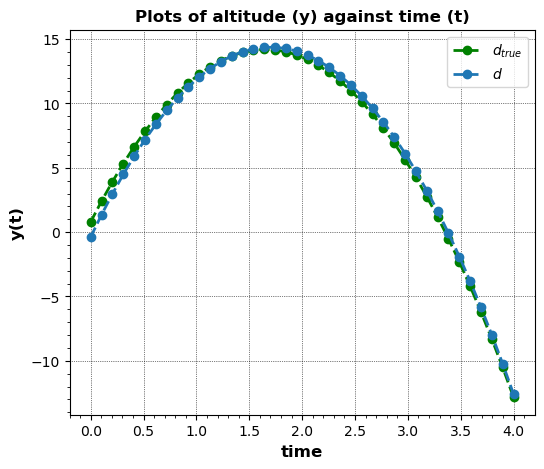

In [7]:
#================= Plotting d_true and noisy data 
plt.figure(figsize = (6,5))
plt.plot(t,d_true,linewidth=2,linestyle='dashed',   marker="o",c="g")
plt.plot(t,d_new,linewidth=2,linestyle='dashed',   marker="o")
plt.legend(['$d_{true}$','$d$'])
plt.title('Plots of altitude (y) against time (t)',fontweight='bold',fontsize=12)
plt.xlabel('time',fontweight='bold',fontsize=12)
plt.ylabel('y(t)',fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

The trajectory for the data points without noise ($d_{true}$) maintains a perfect parabolic shape because the mathematical model is a quadratic equation. However, the trajectory for the data points with noise ($d$) having random noise that follows a normal distribution tends to follow the trajectory of the $d_{true}$ points and follows the same pattern. This is due to the least square applied to the $d$ data that minimizes the sum of the squared differences. 

## Exercise 2

## Q2

In [8]:
#================ Generating Lower Triangular Matrix
n = 100 
z = np.linspace(0.2,20,n)
H = np.zeros((n,n))
midpoint = z-0.1
for i in range(n):
    for j in range(n):
        if z[i] >= midpoint[j]:
            H[i,j] = 1
        else:
            H[i,j] = 0

            
#================ Generating G Matrix
delta_z = z[1] - z[0]
G = H*delta_z
G

array([[0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0.2, 0.2, ..., 0.2, 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0. ],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2]])

In [9]:
H.shape

(100, 100)

## Q3

In [10]:
#================ Generating synthetic (d) and true slowness (mtrue) Matrix
k = 40
v0 = 10
d = np.zeros((n,1))
for i in range(n):
    d[i,:] = (1/40)*(np.log(v0+k*z[i]) - np.log(v0)) #======== noiseseless synthetic data

    
v = v0 + k*(z - 0.1) #======== seismic velocity
mtrue = 1/v  #======== true slowness

In [11]:
d.T

array([[0.01469467, 0.02388779, 0.03059439, 0.03587711, 0.04023595,
        0.04394645, 0.04717674, 0.050037  , 0.05260335, 0.05493061,
        0.05705956, 0.05902135, 0.06084033, 0.0625359 , 0.06412373,
        0.06561671, 0.06702554, 0.06835919, 0.06962528, 0.07083033,
        0.07197996, 0.07307904, 0.07413183, 0.07514207, 0.07611306,
        0.07704775, 0.07794875, 0.0788184 , 0.07965882, 0.0804719 ,
        0.08125936, 0.08202278, 0.08276358, 0.08348305, 0.0841824 ,
        0.08486271, 0.085525  , 0.0861702 , 0.08679916, 0.08741269,
        0.08801152, 0.08859634, 0.0891678 , 0.08972648, 0.09027295,
        0.09080773, 0.09133131, 0.09184415, 0.09234667, 0.0928393 ,
        0.09332241, 0.09379636, 0.09426149, 0.09471812, 0.09516656,
        0.0956071 , 0.09604001, 0.09646556, 0.09688398, 0.09729551,
        0.09770037, 0.09809879, 0.09849095, 0.09887706, 0.0992573 ,
        0.09963184, 0.10000085, 0.10036449, 0.10072292, 0.10107628,
        0.10142472, 0.10176837, 0.10210736, 0.10

In [12]:
v

array([ 14.,  22.,  30.,  38.,  46.,  54.,  62.,  70.,  78.,  86.,  94.,
       102., 110., 118., 126., 134., 142., 150., 158., 166., 174., 182.,
       190., 198., 206., 214., 222., 230., 238., 246., 254., 262., 270.,
       278., 286., 294., 302., 310., 318., 326., 334., 342., 350., 358.,
       366., 374., 382., 390., 398., 406., 414., 422., 430., 438., 446.,
       454., 462., 470., 478., 486., 494., 502., 510., 518., 526., 534.,
       542., 550., 558., 566., 574., 582., 590., 598., 606., 614., 622.,
       630., 638., 646., 654., 662., 670., 678., 686., 694., 702., 710.,
       718., 726., 734., 742., 750., 758., 766., 774., 782., 790., 798.,
       806.])

In [13]:
mtrue

array([0.07142857, 0.04545455, 0.03333333, 0.02631579, 0.02173913,
       0.01851852, 0.01612903, 0.01428571, 0.01282051, 0.01162791,
       0.0106383 , 0.00980392, 0.00909091, 0.00847458, 0.00793651,
       0.00746269, 0.00704225, 0.00666667, 0.00632911, 0.0060241 ,
       0.00574713, 0.00549451, 0.00526316, 0.00505051, 0.00485437,
       0.0046729 , 0.0045045 , 0.00434783, 0.00420168, 0.00406504,
       0.00393701, 0.00381679, 0.0037037 , 0.00359712, 0.0034965 ,
       0.00340136, 0.00331126, 0.00322581, 0.00314465, 0.00306748,
       0.00299401, 0.00292398, 0.00285714, 0.0027933 , 0.00273224,
       0.0026738 , 0.0026178 , 0.0025641 , 0.00251256, 0.00246305,
       0.00241546, 0.00236967, 0.00232558, 0.00228311, 0.00224215,
       0.00220264, 0.0021645 , 0.00212766, 0.00209205, 0.00205761,
       0.00202429, 0.00199203, 0.00196078, 0.0019305 , 0.00190114,
       0.00187266, 0.00184502, 0.00181818, 0.00179211, 0.00176678,
       0.00174216, 0.00171821, 0.00169492, 0.00167224, 0.00165

## Q4

In [14]:
#================ Generating m Matrix
m = np.linalg.solve(G, d)
m.T

array([[0.07347333, 0.0459656 , 0.033533  , 0.02641364, 0.02179417,
        0.0185525 , 0.01615147, 0.01430129, 0.01283177, 0.0116363 ,
        0.01064473, 0.00980895, 0.00909492, 0.00847782, 0.00793918,
        0.0074649 , 0.00704412, 0.00666825, 0.00633047, 0.00602526,
        0.00574814, 0.00549539, 0.00526394, 0.00505119, 0.00485498,
        0.00467344, 0.00450499, 0.00434826, 0.00420208, 0.0040654 ,
        0.00393733, 0.00381709, 0.00370397, 0.00359737, 0.00349673,
        0.00340157, 0.00331145, 0.00322599, 0.00314482, 0.00306764,
        0.00299416, 0.00292411, 0.00285727, 0.00279341, 0.00273235,
        0.0026739 , 0.0026179 , 0.00256419, 0.00251265, 0.00246313,
        0.00241553, 0.00236974, 0.00232565, 0.00228317, 0.00224221,
        0.0022027 , 0.00216456, 0.00212771, 0.0020921 , 0.00205766,
        0.00202434, 0.00199207, 0.00196082, 0.00193054, 0.00190118,
        0.00187269, 0.00184505, 0.00181821, 0.00179215, 0.00176681,
        0.00174219, 0.00171824, 0.00169494, 0.00

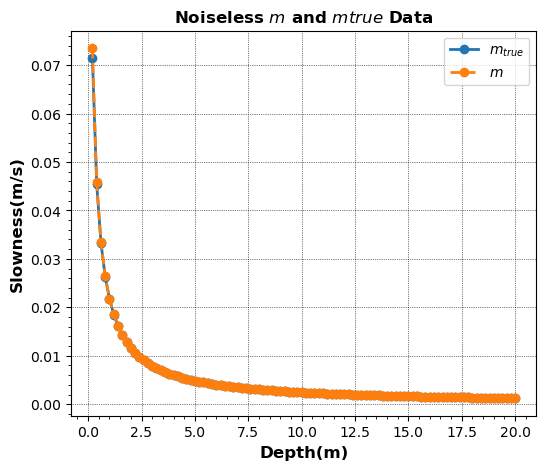

In [15]:
#================= Comparing m and true noiseless data  
plt.figure(figsize = (6,5))
plt.plot(z,mtrue,linewidth=2,marker="o")
plt.plot(z,m,linewidth=2,linestyle='dashed',marker="o")
plt.legend(['$m_{true}$','$m$'])
plt.title('Noiseless $m$ and $mtrue$ Data ',fontweight='bold',fontsize=12)
plt.xlabel('Depth(m)',fontweight='bold',fontsize=12)
plt.ylabel('Slowness(m/s)',fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

## Q5

In [16]:
#================= Generating the noisy data d 
d_noise = np.random.normal(0,0.05,(n,1))+d
d_noise.T    

array([[ 0.01561578,  0.04421288,  0.05405283,  0.02915866,  0.03218022,
         0.03891833,  0.00242227,  0.07497957,  0.01701288,  0.05723576,
        -0.00257825,  0.03376728,  0.05143406,  0.08260604,  0.00703892,
         0.08478499,  0.05788965,  0.05128384,  0.07994203,  0.07639078,
         0.09223663,  0.04668542,  0.07274355,  0.0107441 ,  0.10003515,
         0.12248634,  0.05250999,  0.03682616,  0.11535629,  0.05782243,
         0.15358003,  0.09839565,  0.11997908,  0.09692369,  0.11642675,
         0.08467255,  0.10580419,  0.06163906,  0.16892964,  0.03216963,
         0.14465628,  0.04410895,  0.14999017,  0.10002926,  0.18094644,
         0.03570342,  0.06933689,  0.06477285,  0.073209  ,  0.10849403,
         0.07140141,  0.18549126,  0.004154  ,  0.08840525,  0.1978804 ,
         0.06624184,  0.11166616,  0.13010003,  0.12289323,  0.09138921,
         0.1920417 ,  0.04667834,  0.08922643,  0.0277168 ,  0.08693886,
         0.10436191,  0.11566616,  0.12446629,  0.1

In [17]:
#================= Generating the noisy data m
m_noisy = np.linalg.solve(G, d_noise)
m_noisy.T

array([[ 0.07807891,  0.14298549,  0.04919974, -0.12447085,  0.01510779,
         0.03369055, -0.18248027,  0.36278652, -0.28983348,  0.20111439,
        -0.29907001,  0.18172761,  0.08833389,  0.15585994, -0.37783564,
         0.38873037, -0.13447668, -0.03302909,  0.14329094, -0.01775624,
         0.07922928, -0.22775607,  0.13029066, -0.30999726,  0.44645527,
         0.11225592, -0.34988172, -0.07841917,  0.39265066, -0.2876693 ,
         0.478788  , -0.27592189,  0.10791715, -0.11527697,  0.09751531,
        -0.15877103,  0.10565823, -0.22082564,  0.53645286, -0.68380002,
         0.56243322, -0.50273665,  0.52940613, -0.24980457,  0.40458594,
        -0.72621514,  0.16816737, -0.02282021,  0.04218077,  0.17642514,
        -0.1854631 ,  0.57044926, -0.90668631,  0.42125624,  0.54737578,
        -0.6581928 ,  0.22712162,  0.09216931, -0.03603401, -0.15752006,
         0.50326242, -0.72681679,  0.21274044, -0.3075481 ,  0.29611029,
         0.08711523,  0.05652123,  0.04400067, -0.0

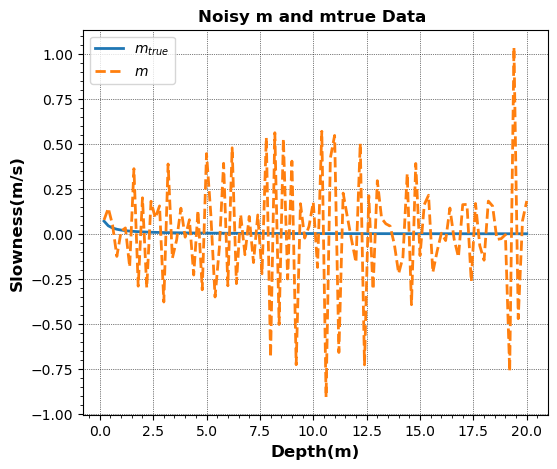

In [18]:
#================= Comparing m and true noiseless and noise data  
plt.figure(figsize = (6,5))
plt.plot(z,mtrue,linewidth=2)
plt.plot(z, m_noisy,linewidth=2,linestyle='dashed')
plt.legend(['$m_{true}$','$m$'])
plt.title('Noisy m and mtrue Data ',fontweight='bold',fontsize=12)
plt.xlabel('Depth(m)',fontweight='bold',fontsize=12)
plt.ylabel('Slowness(m/s)',fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

The model has changed changed drastically and become unstable after a little perturbation on the data.

## Q6

In [19]:
#================ Generating Lower Triangular Matrix
n = 6 
z = np.linspace(0.2,20,n)
H = np.zeros((n,n))
midpoint = z-0.1
for i in range(n):
    for j in range(n):
        if z[i] > midpoint[j]:
            H[i,j] = 1
        else:
            H[i,j] = 0

            
#================ Generating G Matrix
delta_z = z[1] - z[0]
G = H*delta_z
G

array([[3.96, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [3.96, 3.96, 0.  , 0.  , 0.  , 0.  ],
       [3.96, 3.96, 3.96, 0.  , 0.  , 0.  ],
       [3.96, 3.96, 3.96, 3.96, 0.  , 0.  ],
       [3.96, 3.96, 3.96, 3.96, 3.96, 0.  ],
       [3.96, 3.96, 3.96, 3.96, 3.96, 3.96]])

In [20]:
#================ Generating synthetic (d) and true slowness (mtrue) Matrix
k = 40
v0 = 10
d = np.zeros((n,1))
for i in range(n):
    d[i,:] = (1/40)*(np.log(v0+k*z[i]) - np.log(v0)) #======== noiseseless synthetic data

    
v = v0 + k*(z - 0.1) #======== seismic velocity
mtrue = 1/v  #======== true slowness

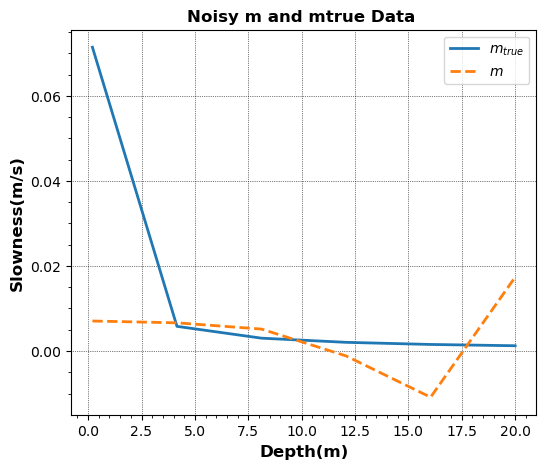

In [21]:
#================= Generating the noisy data d 
n = 6
d_noise = np.random.normal(0,0.05,(n,1))+d
d_noise.T  

#================= Generating the noisy data m
m_noisy = np.linalg.solve(G, d_noise)
m_noisy.T

#================= Comparing m and true noiseless and noise data  
plt.figure(figsize = (6,5))
plt.plot(z,mtrue,linewidth=2)
plt.plot(z, m_noisy,linewidth=2,linestyle='dashed')
plt.legend(['$m_{true}$','$m$'])
plt.title('Noisy m and mtrue Data ',fontweight='bold',fontsize=12)
plt.xlabel('Depth(m)',fontweight='bold',fontsize=12)
plt.ylabel('Slowness(m/s)',fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

No, the recoveryu of the true model did not improve.